In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from matplotlib import pyplot as plt
from abnumber import Chain
from bin.evaluation import plot_oasis_curves

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
oasis_curves = pd.read_excel('../../data/germlines/imgt_human_v_genes_raw_oasis.xlsx', sheet_name='OASis Curves', index_col=0)
oasis_curves.insert(0, 'Family', oasis_curves.index.map(lambda i: i.split('-')[0].split('/')[0]))
oasis_curves.insert(1, 'Chain', oasis_curves.index.map(lambda i: i[2]))
oasis_curves.head()

,Family,Chain,0%,1%,2%,3%,4%,5%,6%,7%,...,81%,82%,83%,84%,85%,86%,87%,88%,89%,90%
Antibody,,,,,,,,,,,,,,,,,,,,,
IGHV1-18*01,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IGHV1-18*02,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IGHV1-18*03,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.966667,0.966667,0.955556,0.955556,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
IGHV1-18*04,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
IGHV1-2*01,IGHV1,H,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.911111,0.900000,0.900000,0.900000,0.900000,0.900000,0.877778,0.877778,0.877778,0.877778


In [3]:
COLORS = [
     (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
     (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
     (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
     (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0),
     (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
     (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
     (0.8901960784313725, 0.4666666666666667, 0.7607843137254902, 1.0),
     (0.4980392156862745, 0.4980392156862745, 0.4980392156862745, 1.0),
     (0.7372549019607844, 0.7411764705882353, 0.13333333333333333, 1.0),
     (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
     (0.2, 0.2, 0.2, 1.0),
]

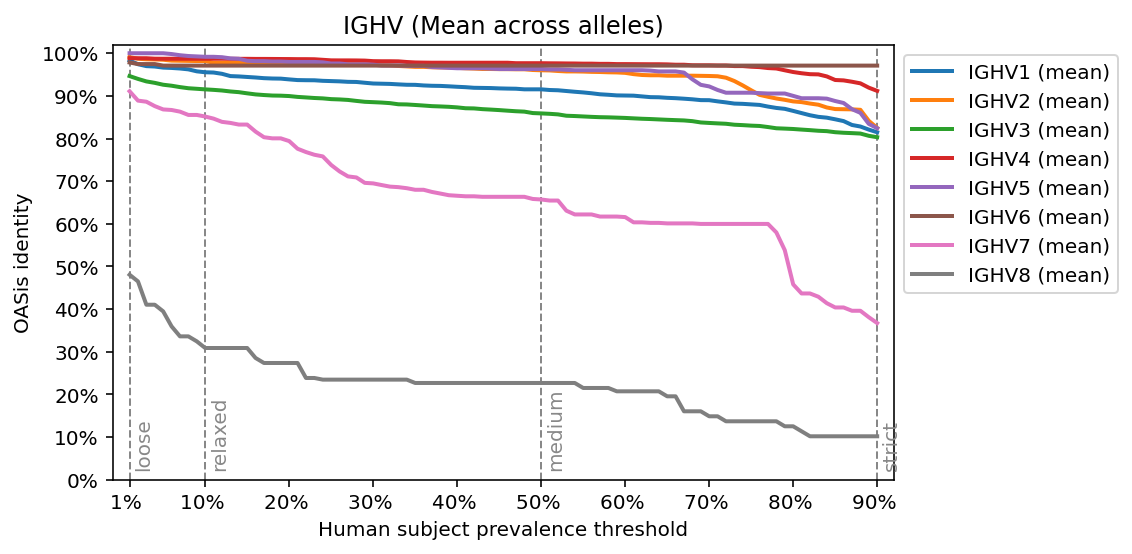

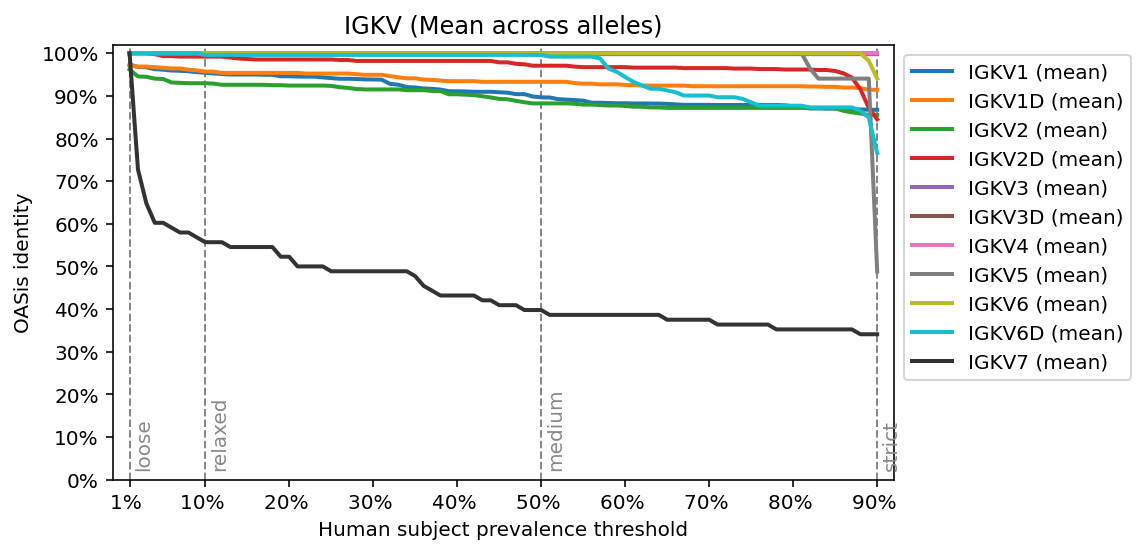

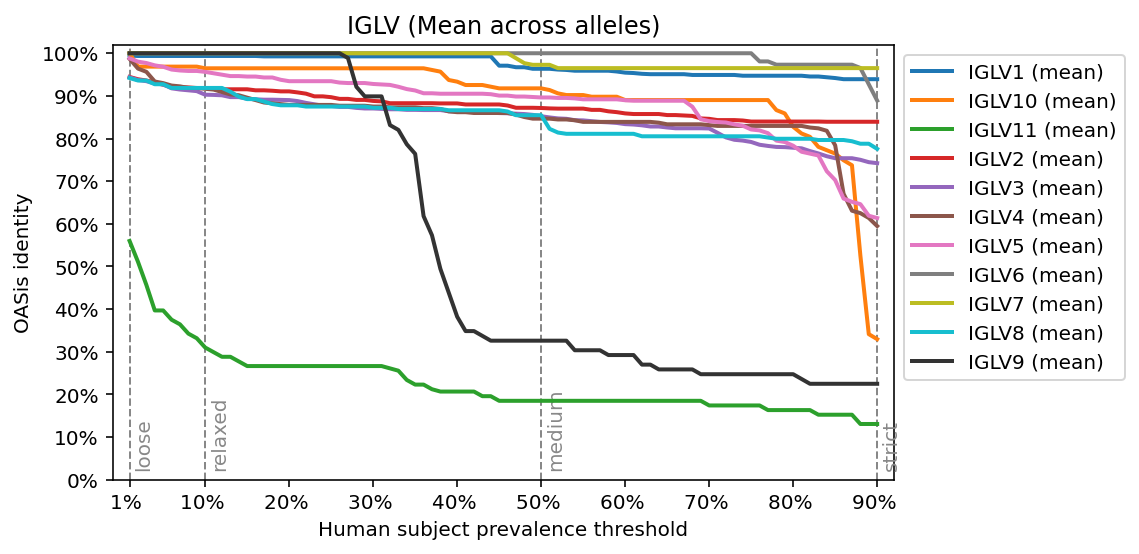

In [4]:
for chain in 'HKL':
    fig, ax = plt.subplots(figsize=(7, 4))
    mean = oasis_curves[oasis_curves['Chain'] == chain].groupby('Family').mean().T.add_suffix(' (mean)').T
    colors = dict(zip(mean.index, COLORS))
    plot_oasis_curves(mean, errorbars=False, ax=ax, lw=2, colors=colors)
    ax.set_ylim(0, 1.02)
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    ax.set_title(f'IG{chain}V (Mean across alleles)')

In [67]:
prevalence_subjects = (oasis_curves[[c for c in oasis_curves if '%' in c]] >= 0.9999).apply(lambda row: row[row].index[-1], axis=1)
prevalence_subjects = prevalence_subjects.str.replace('%','').astype(float)
prevalence_subjects.sort_values()

Antibody
IGHV4-31*05          0.0
IGHV3/OR16-15*01     0.0
IGHV3/OR16-15*02     0.0
IGHV3/OR16-16*01     0.0
IGHV3/OR16-18*01     0.0
                    ... 
IGHV3-11*01         90.0
IGHV3-11*04         90.0
IGHV4-39*07         90.0
IGHV4-39*05         90.0
IGHV1-18*01         90.0
Length: 608, dtype: float64

In [73]:
prevalence_best_by_family = prevalence_subjects.groupby([oasis_curves['Family'], oasis_curves['Chain']])
prevalence_best_by_family = prevalence_best_by_family.apply(lambda rows: rows.sort_values(ascending=False)[:3])
prevalence_best_by_family = prevalence_best_by_family.rename('Subjects').reset_index()
prevalence_best_by_family.head()

,Family,Chain,Antibody,Subjects
0,IGHV1,H,IGHV1-69*06,90.0
1,IGHV1,H,IGHV1-69D*01,90.0
2,IGHV1,H,IGHV1-18*02,90.0
3,IGHV2,H,IGHV2-26*02,90.0
4,IGHV2,H,IGHV2-26*01,90.0


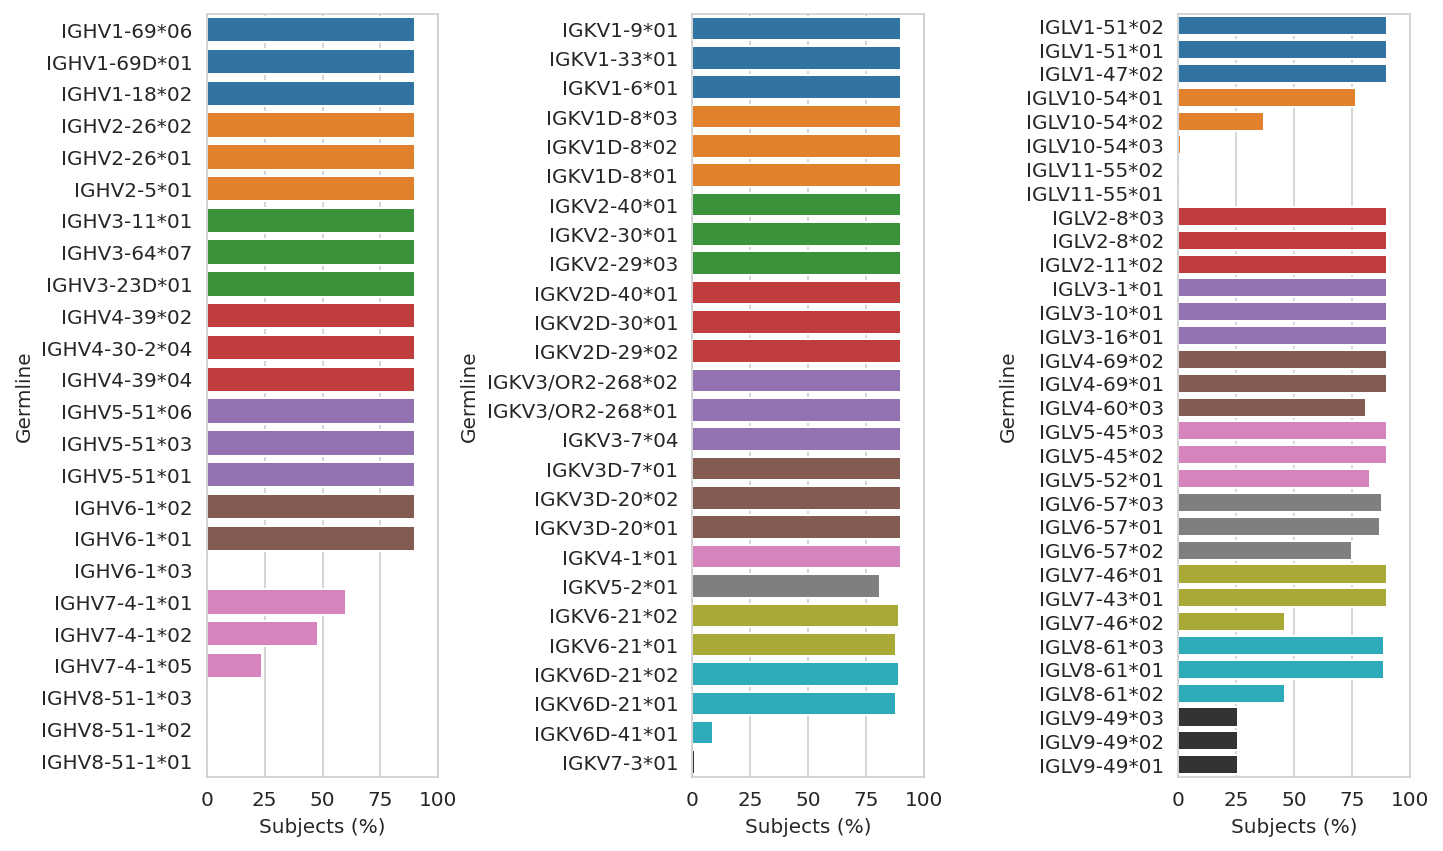

In [74]:
with sns.axes_style('whitegrid'):
    fig, axes = plt.subplots(1, 3, figsize=(10, 6))
    for i, (chain_type, prevalence) in enumerate(prevalence_best_by_family.groupby('Chain')):
        families = prevalence['Family'].unique().tolist()
        ax = sns.barplot(
            data=prevalence,
            y='Antibody',
            x='Subjects',
            palette=[COLORS[families.index(f)] for f in prevalence['Family']],
            ax=axes[i]
        )
        ax.set_xticks([0, 25, 50, 75, 100])
        ax.set_xlabel('Subjects (%)')
        ax.set_ylabel('Germline')
    fig.tight_layout();

In [28]:
#germline_peptides = pd.read_excel('../../data/germlines/imgt_human_v_genes_raw_oasis.xlsx', sheet_name=None)